In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

In [72]:
tab = pd.read_csv('data/HMD/Deaths_1x1.txt', delim_whitespace=True, skiprows=1)

In [73]:
tab.head()

,Year,Age,Female,Male,Total
0,1933,0,52615.77,68438.11,121053.88
1,1933,1,8917.13,10329.16,19246.29
2,1933,2,4336.92,5140.05,9476.97
3,1933,3,3161.59,3759.88,6921.47
4,1933,4,2493.84,2932.59,5426.43


In [74]:
tab.Age = tab.Age.replace(to_replace = {'110+': '110'})

In [88]:
tab['Age'] = pd.to_numeric(tab['Age'])


In [89]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9657 entries, 0 to 9656
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    9657 non-null   int64  
 1   Age     9657 non-null   int64  
 2   Female  9657 non-null   float64
 3   Male    9657 non-null   float64
 4   Total   9657 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 377.4 KB


In [78]:
duplicate_rows_df = tab[tab.duplicated()]
print(duplicate_rows_df.shape)

(0, 5)


In [79]:
tab.isnull().sum()

Year      0
Age       0
Female    0
Male      0
Total     0
dtype: int64

<AxesSubplot:xlabel='Year'>

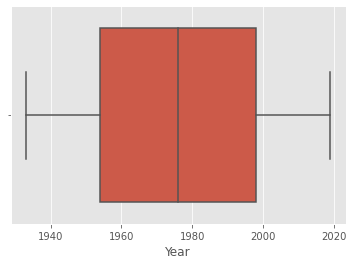

In [80]:
sns.boxplot(x=tab['Year'])

<AxesSubplot:xlabel='Age'>

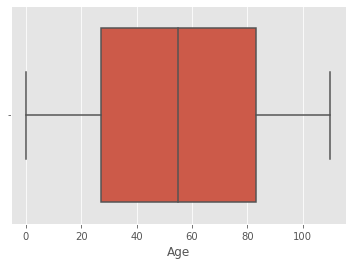

In [90]:
sns.boxplot(x=tab['Age'])

<AxesSubplot:xlabel='Female'>

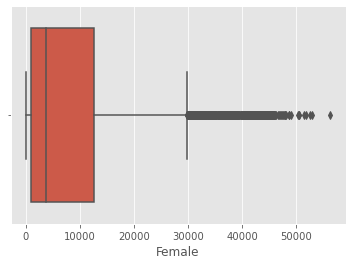

In [92]:
sns.boxplot(x=tab['Female'])

<AxesSubplot:xlabel='Male'>

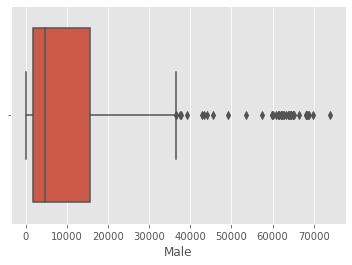

In [93]:
sns.boxplot(x=tab['Male'])

<AxesSubplot:xlabel='Total'>

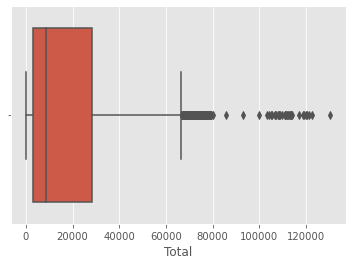

In [94]:
sns.boxplot(x=tab['Total'])

In [96]:
Q1 = tab.quantile(0.25)
Q3 = tab.quantile(0.75)
IQR = Q3-Q1
print(IQR)


Year         44.00
Age          56.00
Female    11532.72
Male      13896.71
Total     25449.89
dtype: float64


In [98]:
tab2 = tab[~((tab < (Q1-1.5 * IQR)) |(tab > (Q3 + 1.5 * IQR))).any(axis=1)]
tab2.shape

(9124, 5)

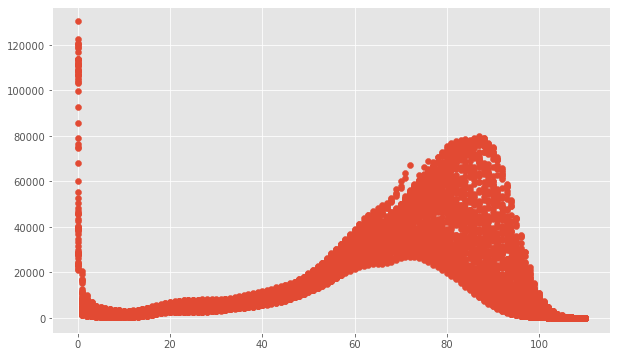

In [105]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(tab['Age'], tab['Total']);